In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d   # for 3D object of super-ellipse SWS


class SWS_view_lib:
    def __init__(self):
        """
        R. Takaku, 2024.5.22
        SWS view 
        """
        pass
    
    def equation(self,w0,alpha,h,b,p):
        z = np.linspace(0,h,1001)
        w = w0 + ((p-b)-w0)*(1-(z/h)**alpha)
        return w,z

    def Plot_SWS(self,ax,w_arr,z_arr,lw = 1,col = 'k'):
        ax.plot(w_arr/2,w_arr/2,z_arr,col,linewidth = lw)
        ax.plot(w_arr/2,-w_arr/2,z_arr,col,linewidth = lw)
        ax.plot(-w_arr/2,-w_arr/2,z_arr,col,linewidth = lw)
        ax.plot(-w_arr/2,w_arr/2,z_arr,col,linewidth = lw)

        bottom = np.array([[w_arr[0],-w_arr[0],-w_arr[0],w_arr[0],w_arr[0]],
                        [w_arr[0],w_arr[0],-w_arr[0],-w_arr[0],w_arr[0]]])/2
        top = np.array([[w_arr[-1],-w_arr[-1],-w_arr[-1],w_arr[-1],w_arr[-1]],
                        [w_arr[-1],w_arr[-1],-w_arr[-1],-w_arr[-1],w_arr[-1]]])/2
        ax.plot(bottom[0],bottom[1],np.ones(5)*z_arr[0],col,linewidth = lw)
        ax.plot(top[0],top[1],np.ones(5)*z_arr[-1],col,linewidth = lw)

    def Plot_layout(self,ax,el,az):
        ax.view_init(elev=el, azim=az)
        ax.set_box_aspect((w_arr[0],w_arr[0],z_arr[-1]))
        ax.axis('off')
    





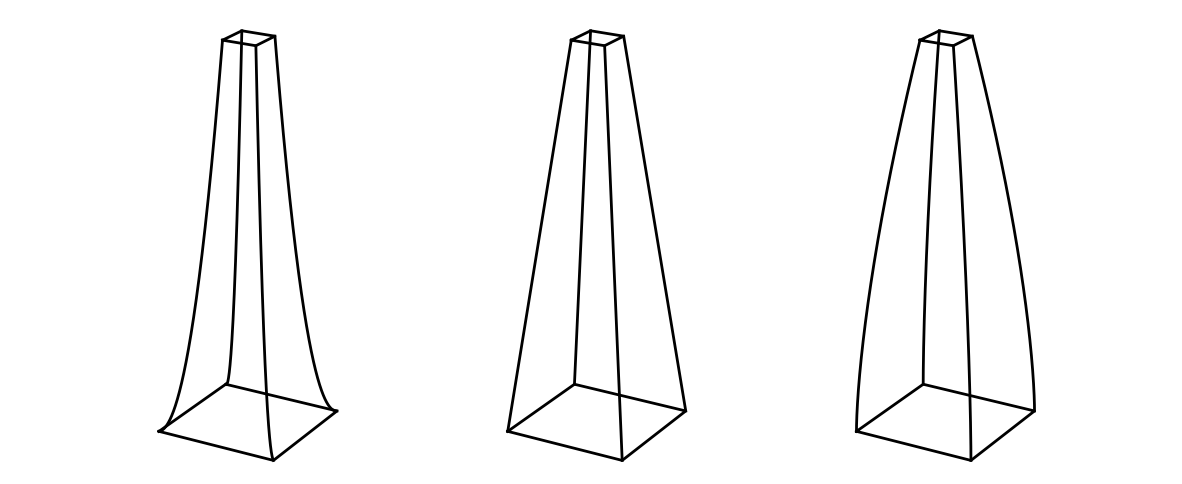

In [2]:

lib = SWS_view_lib()
# Geometry
w0 = 0.15   # top width [mm]
alpha = 0.5 # alpha
h = 1.5     # height [mm]
b = 0       # groove width [mm]
p = 0.54    # ptich [mm]

alpha = np.array([0.5,1.0,1.5]) # alpha (array this time)

col = 'k' # line color
lw = 2    # line width



# Figure
fig = plt.figure(figsize = (15,10))
el = 21  # elevation
az = 120 # azimth

for i in range(0,3):
    w_arr,z_arr = lib.equation(w0,alpha[i],h,b,p)
    
    ax = fig.add_subplot(1,3,i+1, projection='3d')
    lib.Plot_layout(ax,el,az)
    lib.Plot_SWS(ax,w_arr,z_arr,lw,col)

fig.subplots_adjust(wspace = -0.25)
plt.savefig('sws.png',dpi = 1000,bbox_inches = 'tight',transparent = False)
